## House price predictions

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [2]:
#read the data

In [32]:
train = pd.read_csv(r'C:\Users\CTS\Documents\Praxis classroom\Lectures\MI\wk3_kc_house_train_data.csv')
test = pd.read_csv(r'C:\Users\CTS\Documents\Praxis classroom\Lectures\MI\wk3_kc_house_test_data\wk3_kc_house_test_data.csv')

In [3]:

train.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
1,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
2,9212900260,20140527T000000,468000.0,2,1.00,1160,6000,1.0,0,0,...,7,860,300,1942,0,98115,47.6900,-122.292,1330,6000
3,114101516,20140528T000000,310000.0,3,1.00,1430,19901,1.5,0,0,...,7,1430,0,1927,0,98028,47.7558,-122.229,1780,12697
4,6054650070,20141007T000000,400000.0,3,1.75,1370,9680,1.0,0,0,...,7,1370,0,1977,0,98074,47.6127,-122.045,1370,10208


In [4]:
#checking for the missing values
train.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [5]:
train.shape

(9761, 21)

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9761 entries, 0 to 9760
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             9761 non-null   int64  
 1   date           9761 non-null   object 
 2   price          9761 non-null   float64
 3   bedrooms       9761 non-null   int64  
 4   bathrooms      9761 non-null   float64
 5   sqft_living    9761 non-null   int64  
 6   sqft_lot       9761 non-null   int64  
 7   floors         9761 non-null   float64
 8   waterfront     9761 non-null   int64  
 9   view           9761 non-null   int64  
 10  condition      9761 non-null   int64  
 11  grade          9761 non-null   int64  
 12  sqft_above     9761 non-null   int64  
 13  sqft_basement  9761 non-null   int64  
 14  yr_built       9761 non-null   int64  
 15  yr_renovated   9761 non-null   int64  
 16  zipcode        9761 non-null   int64  
 17  lat            9761 non-null   float64
 18  long    

In [7]:
train.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,9.761000e+03,9.761000e+03,9761.000000,9761.000000,9761.000000,9.761000e+03,9761.000000,9761.000000,9761.000000,9761.000000,9761.00000,9761.000000,9761.000000,9761.000000,9761.000000,9761.000000,9761.000000,9761.000000,9761.000000,9761.000000
mean,4.605288e+09,5.427350e+05,3.375884,2.117175,2086.734146,1.521526e+04,1.486067,0.008401,0.248028,3.415531,7.66151,1793.291159,293.442987,1970.799508,86.066592,98077.790185,47.560052,-122.214322,1992.359697,12824.785165
std,2.876044e+09,3.795276e+05,0.960697,0.773971,927.194303,4.126673e+04,0.532317,0.091275,0.787877,0.650552,1.18268,835.763817,442.612722,29.240009,405.417369,53.203594,0.140236,0.139895,687.322247,26518.337402
min,1.200019e+06,8.000000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.00000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.514000,620.000000,660.000000
25%,2.126049e+09,3.200000e+05,3.000000,1.750000,1420.000000,5.100000e+03,1.000000,0.000000,0.000000,3.000000,7.00000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.467800,-122.327000,1490.000000,5160.000000
50%,3.905041e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.642000e+03,1.500000,0.000000,0.000000,3.000000,7.00000,1570.000000,0.000000,1975.000000,0.000000,98065.000000,47.572200,-122.229000,1840.000000,7660.000000
75%,7.338403e+09,6.490000e+05,4.000000,2.500000,2570.000000,1.066000e+04,2.000000,0.000000,0.000000,4.000000,8.00000,2230.000000,570.000000,1996.000000,0.000000,98117.000000,47.680400,-122.126000,2370.000000,10113.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,12050.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.00000,8860.000000,3480.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.319000,5790.000000,560617.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E4A40A3FD0>,
      dtype=object)

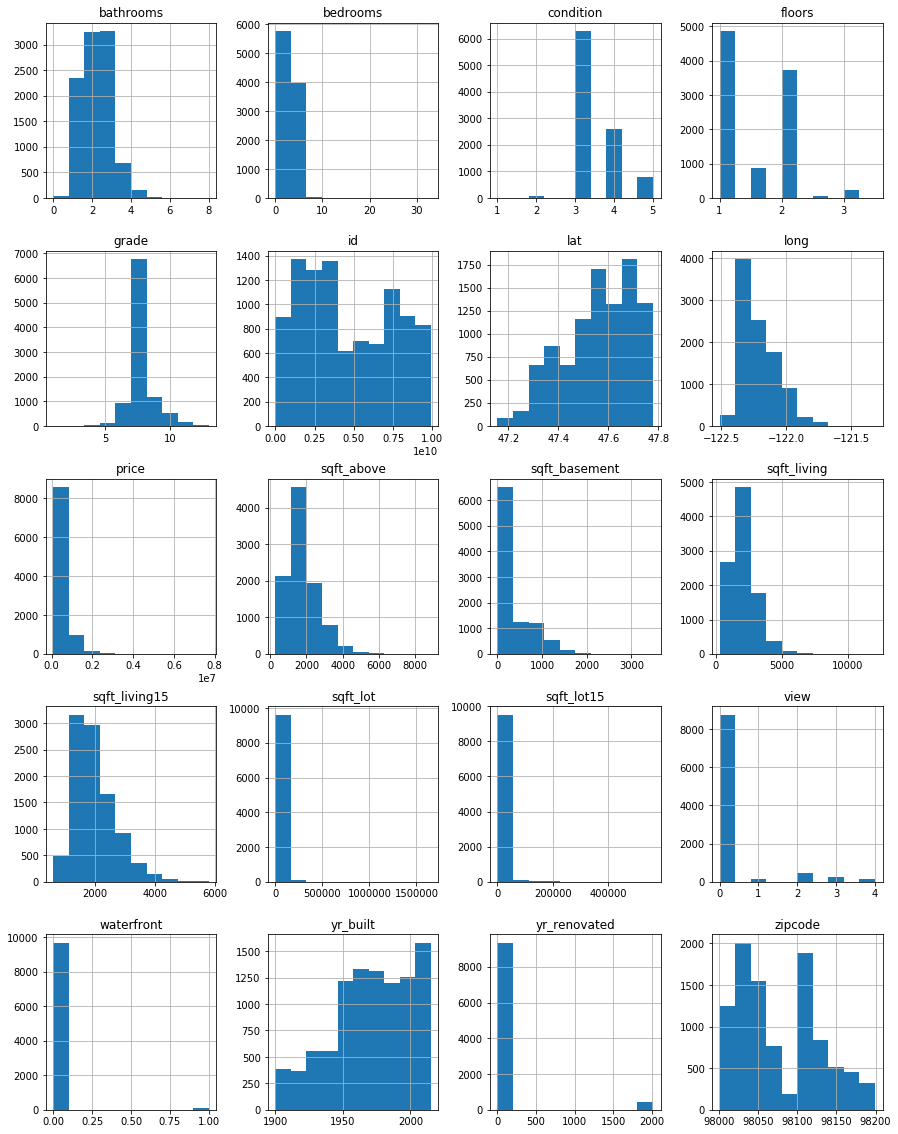

In [8]:
#plotting the histogram of dataframe
train.hist(figsize=(15,20))

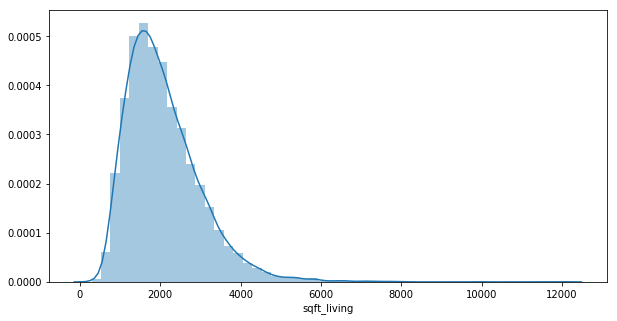

In [9]:
fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(10,5))
sns.distplot(train['sqft_living'],hist=True,kde=True,rug=False,label='sqft_living',norm_hist=True)

In [33]:
#taking log values to avoid positive skewness

train['sqft_living'] = np.log(train['sqft_living'])



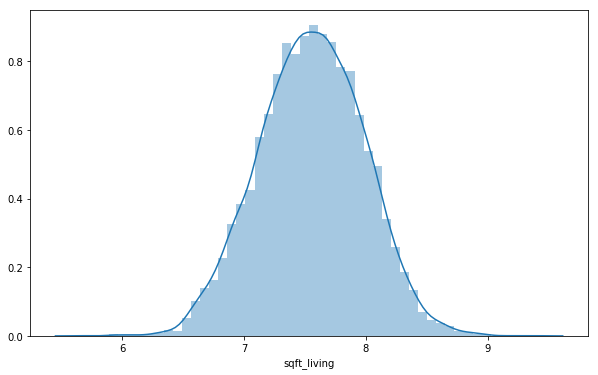

In [11]:
fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(10,6))
sns.distplot(train['sqft_living'],hist=True,kde=True,rug=False,label='sqft_living',norm_hist=True)

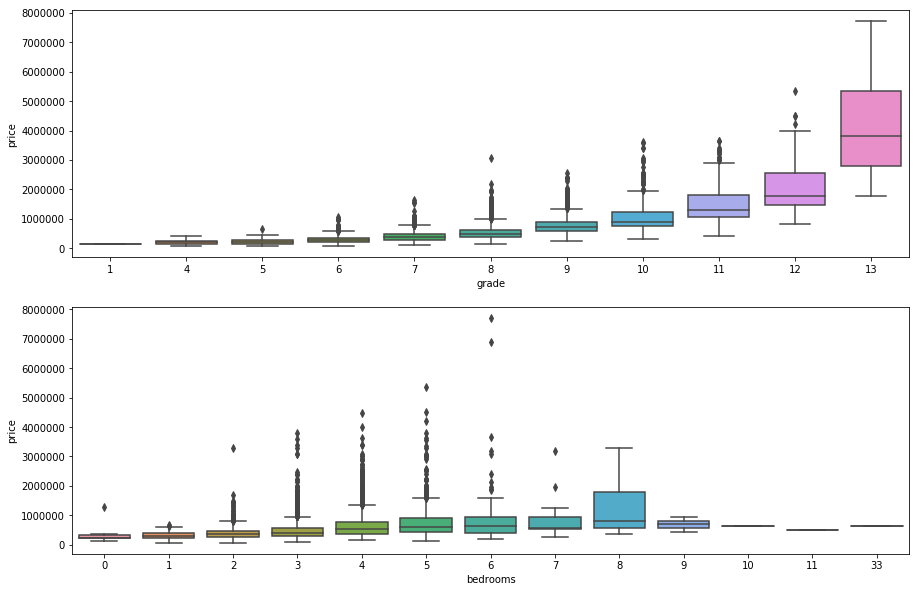

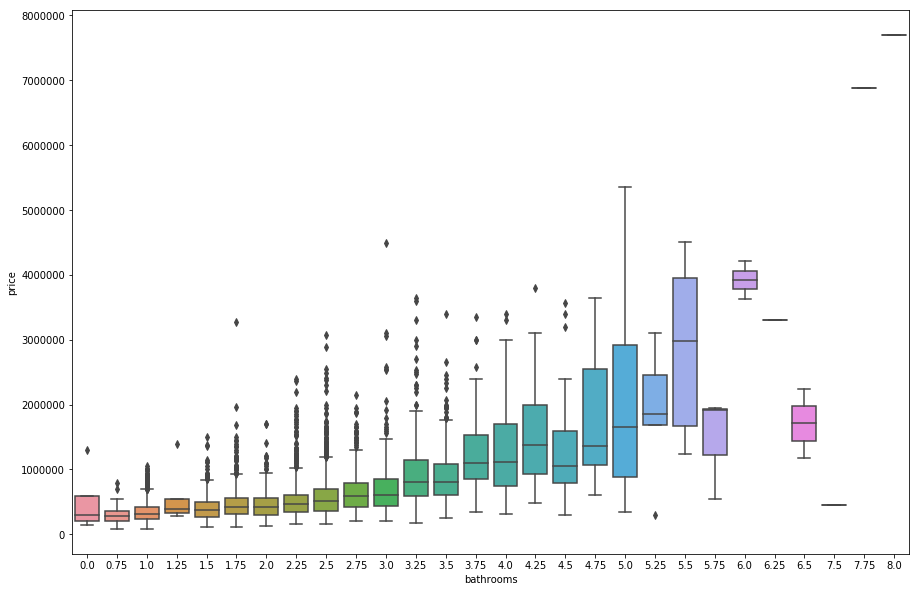

In [12]:
fig,ax=plt.subplots(2,1,figsize=(15,10))
sns.boxplot(x=train['grade'],y=train['price'],ax=ax[0])
sns.boxplot(x=train['bedrooms'],y=train['price'],ax=ax[1])
_ , axes = plt.subplots(1, 1, figsize=(15,10))
sns.boxplot(x=train['bathrooms'],y=train['price'])

In [65]:
#removing outliers from the data
train= train[train['bedrooms']!=33]

In [45]:
train.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [35]:
train= train.drop(columns=['id','date'],axis=1)

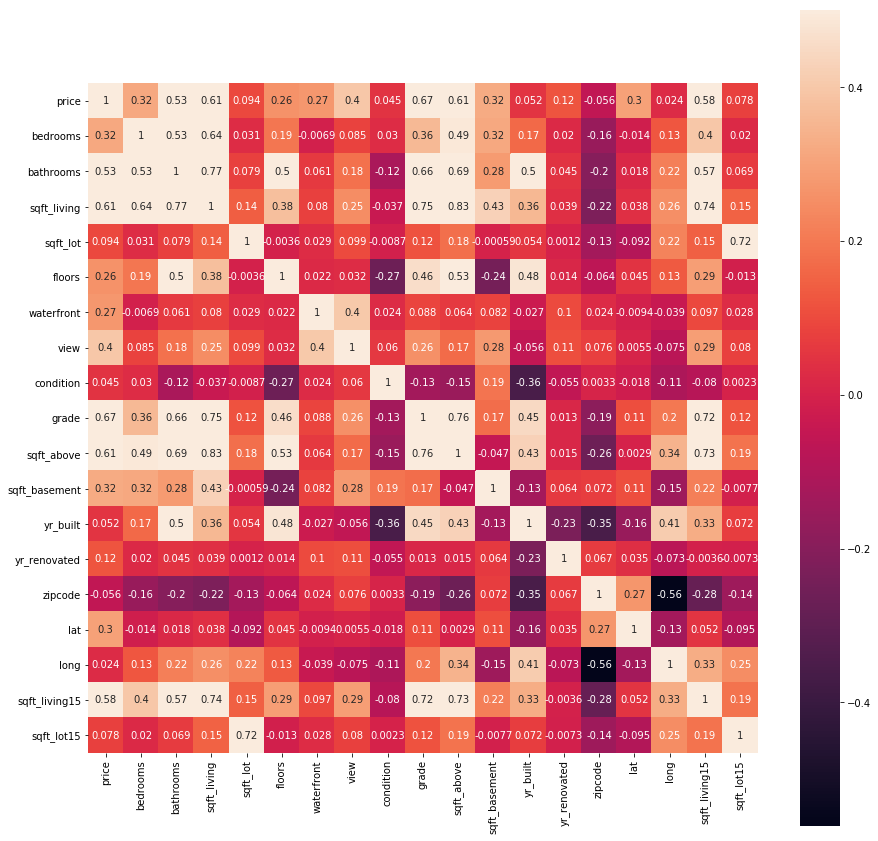

In [15]:
plt.figure(figsize=(15,15))
corr= train.corr()
sns.heatmap(corr,vmax=.5,square=True,annot=True)

In [36]:
#get dummies for zipcode

dummies=pd.get_dummies(train.zipcode)
train=pd.concat([train,dummies], axis=1)

In [37]:
train.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,98146,98148,98155,98166,98168,98177,98178,98188,98198,98199
0,604000.0,4,3.00,7.580700,5000,1.0,0,0,5,7,...,0,0,0,0,0,0,0,0,0,0
1,1225000.0,4,4.50,8.597851,101930,1.0,0,0,3,11,...,0,0,0,0,0,0,0,0,0,0
2,468000.0,2,1.00,7.056175,6000,1.0,0,0,4,7,...,0,0,0,0,0,0,0,0,0,0
3,310000.0,3,1.00,7.265430,19901,1.5,0,0,4,7,...,0,0,0,0,0,0,0,0,0,0
4,400000.0,3,1.75,7.222566,9680,1.0,0,0,4,7,...,0,0,0,0,0,0,0,0,0,0


In [66]:
#feature selection
removing_variable_list = ['price','zipcode','sqft_lot15','lat','long','yr_renovated',
                          'condition','waterfront','sqft_lot','floors','yr_built']

In [43]:
x_train = train[list(set(train.columns) - set(removing_variable_list))]

In [44]:
x_train.columns

Index([          98052,           98053,           98055,           98056,
                 98058,           98059,           98065,      'bedrooms',
                 98070,           98072,           98074,           98075,
                 98077,           98092,           98102,           98103,
                 98105,           98106,           98107,           98108,
                 98109,           98112,           98115,           98116,
                 98117,           98118,           98119,           98122,
                 98125,           98126, 'sqft_living15',           98133,
                 98136,           98144,           98146,           98148,
                 98155,           98166,           98168,           98177,
                 98178,           98188, 'sqft_basement',           98198,
                 98199,     'bathrooms',         'grade',   'sqft_living',
                 98001,           98002,           98003,    'sqft_above',
                 98004,  

In [45]:
from sklearn.preprocessing import StandardScaler
x_train=StandardScaler().fit_transform(x_train)
x_train

array([[-0.16673686, -0.14090319, -0.11062606, ..., -0.16412199,
        -0.10378105, -0.31483909],
       [-0.16673686,  7.0970713 , -0.11062606, ..., -0.16412199,
        -0.10378105, -0.31483909],
       [-0.16673686, -0.14090319, -0.11062606, ..., -0.16412199,
        -0.10378105, -0.31483909],
       ...,
       [-0.16673686, -0.14090319, -0.11062606, ..., -0.16412199,
        -0.10378105, -0.31483909],
       [-0.16673686, -0.14090319, -0.11062606, ..., -0.16412199,
        -0.10378105, -0.31483909],
       [-0.16673686, -0.14090319, -0.11062606, ..., -0.16412199,
        -0.10378105, -0.31483909]])

In [46]:

y_train = train['price'].values
y_train= np.log(y_train)

In [47]:
y_train

array([13.31132948, 14.0184514 , 13.05622357, ..., 13.82298257,
       12.90445858, 12.69158046])

In [48]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
model = regressor.fit(x_train,y_train)
print("train Accuracy",regressor.score(x_train,y_train))

train Accuracy 0.8718469387280576


In [49]:
y_pred1 = regressor.predict(x_train)

In [50]:
#taking antilog of predictions
predictions1 = np.exp(y_pred1)

In [53]:
print('Mean Absolute Error:', metrics.mean_absolute_error(train[['price']].values, predictions1))
print('Mean Squared Error:', metrics.mean_squared_error(train[['price']].values, predictions1))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(train[['price']].values, predictions1)))

Mean Absolute Error: 79637.1193617404
Mean Squared Error: 21208275231.56851
Root Mean Squared Error: 145630.61227492147


### Using test data to check the predictions

In [54]:
#taking log in sqft living
test['sqft_living'] = np.log(test['sqft_living'])


In [55]:
test= test.drop(columns=['id','date'],axis=1)

In [58]:
#get dummies for zipcode

dummies=pd.get_dummies(test.zipcode)
test=pd.concat([test,dummies], axis=1)

In [59]:
x_test = test[list(set(test.columns) - set(removing_variable_list))]

In [60]:
y_test= test['price']
y_test= np.log(y_test)

In [61]:
x_test=StandardScaler().fit_transform(x_test)


In [64]:
regressor = LinearRegression()
model = regressor.fit(x_test,y_test)
print("valid Accuracy",regressor.score(x_test,y_test))

y_pred2 = regressor.predict(x_test)
predictions2 = np.exp(y_pred2)

print('Mean Absolute Error:', metrics.mean_absolute_error(test[['price']].values, predictions2))
print('Mean Squared Error:', metrics.mean_squared_error(test[['price']].values, predictions2))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(test[['price']].values, predictions2)))

valid Accuracy 0.8706873363442953
Mean Absolute Error: 75479.49730453176
Mean Squared Error: 17388220198.232338
Root Mean Squared Error: 131864.40079958024
